In [2]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"C:\Users\urfre\OneDrive\Desktop\Superstore.csv",encoding='latin1')
df['Order Date']= pd.to_datetime(df['Order Date'],format='mixed')
df['Ship Date']= pd.to_datetime(df['Ship Date'],format='mixed')

In [4]:
df.shape

(9994, 21)

In [5]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,2013-09-11,2013-12-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2013-152156,2013-09-11,2013-12-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [7]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [8]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [9]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2013-04-13 13:31:46.984190464,2013-04-21 14:12:59.507704576,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2011-01-02 00:00:00,2011-01-02 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2012-05-01 00:00:00,2012-05-07 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2013-06-09 00:00:00,2013-06-12 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2014-04-11 00:00:00,2014-05-04 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2014-12-31 00:00:00,2015-06-01 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


# Region


In [10]:
df['Region'].value_counts()

Region
West       3203
East       2848
Central    2323
South      1620
Name: count, dtype: int64

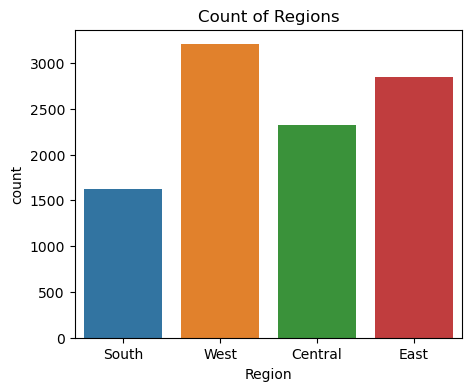

In [11]:
plt.figure(figsize=(5,4))
plt.title("Count of Regions")
plt.savefig("Count of Regions.jpg")
sns.countplot(x="Region",data=df)
plt.show()

# Ship Mode

In [12]:
df['Ship Mode'] = df["Ship Mode"].replace("Same Day","Second Class")

In [13]:
df["Ship Mode"].value_counts()

Ship Mode
Standard Class    5968
Second Class      2488
First Class       1538
Name: count, dtype: int64

In [14]:
x = df['Ship Mode'].value_counts().index
y = df['Ship Mode'].value_counts().values

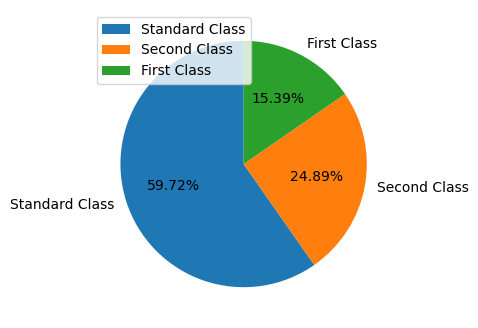

In [15]:
plt.figure(figsize=(5,4))
plt.pie(y,labels=x,startangle=90,autopct="%0.2f%%")
plt.legend(loc=2)
plt.show()


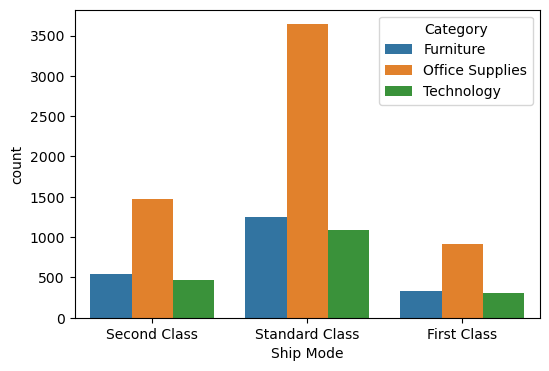

In [16]:
plt.figure(figsize=(6,4))
sns.countplot(x="Ship Mode", data=df,hue="Category")
plt.show()

# Segment

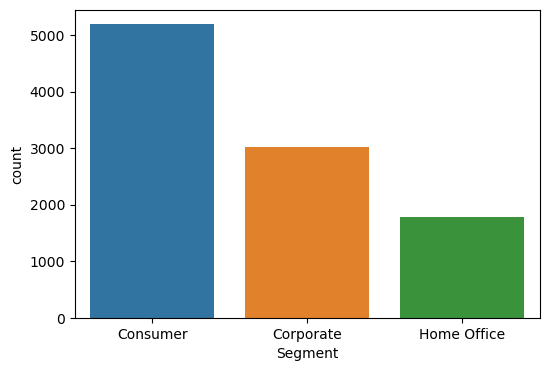

In [17]:
plt.figure(figsize=(6,4))
sns.countplot(x="Segment", data=df)
plt.show()

# Category

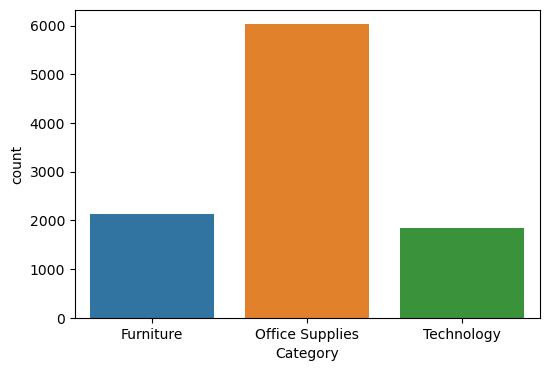

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(x="Category", data=df)
plt.show()

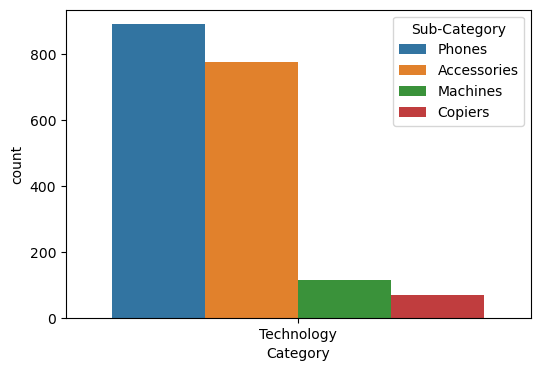

In [19]:
plt.figure(figsize=(6,4))
sns.countplot(x="Category", data=df[df["Category"]=="Technology"],hue="Sub-Category")
plt.show()

# OrderDate

In [20]:
df["Order Year"] = df["Order Date"].dt.year

In [21]:
df["Order Year"].value_counts()

Order Year
2014    3319
2013    2580
2012    2102
2011    1993
Name: count, dtype: int64

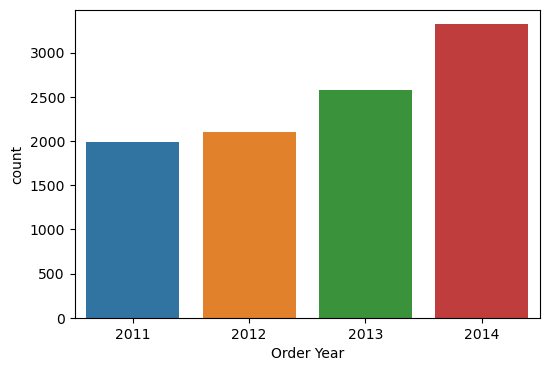

In [22]:
plt.figure(figsize=(6,4))
sns.countplot(x="Order Year", data=df)
plt.show()

# Profit By Category

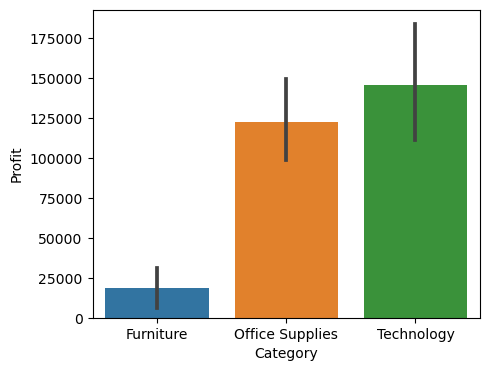

In [23]:
plt.figure(figsize=(5,4))
sns.barplot(x='Category', y='Profit',data=df,estimator='sum')
plt.show()

# State

In [24]:
df['State'].value_counts()[:7]

State
California      2001
New York        1128
Texas            985
Pennsylvania     587
Washington       506
Illinois         492
Ohio             469
Name: count, dtype: int64

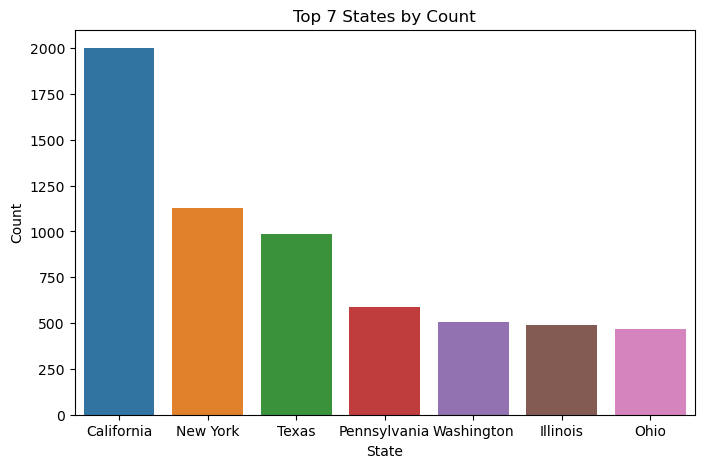

In [25]:
State = df['State'].value_counts().nlargest(7)
plt.figure(figsize=(8,5))
sns.barplot(y=State.values, x=State.index,)
plt.title('Top 7 States by Count')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()

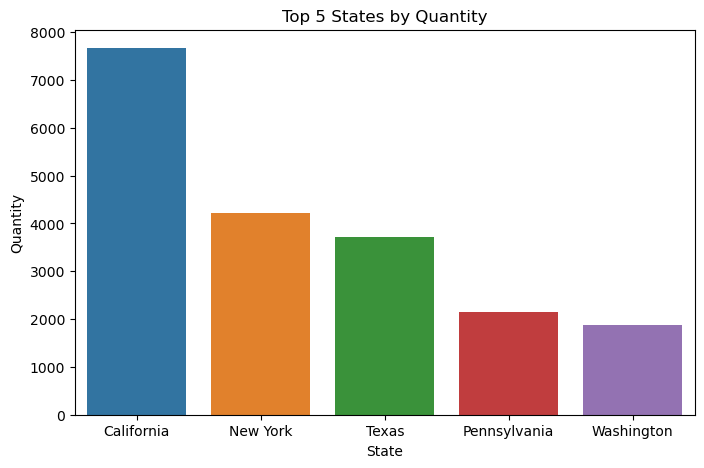

In [26]:
State = df.groupby('State')['Quantity'].sum().nlargest(5)
plt.figure(figsize=(8,5))
sns.barplot(y=State.values, x=State.index,)
plt.title('Top 5 States by Quantity')
plt.xlabel('State')
plt.ylabel('Quantity')
plt.show()


# Conclusion

The Superstore sales analysis reveals key insights to guide strategic decisions. 
Sales have shown consistent growth, with certain regions like the West and East outperforming others. 
Product categories such as Technology and Office Supplies contribute more to profitability, 
while discounting strategies need optimization to balance volume with margins. 
Customer segmentation highlights the importance of tailored strategies for different segments, enhancing satisfaction and loyalty. 
Operational improvements in supply chain efficiency and inventory management can further drive success. 
Overall, focusing on high-growth areas, optimizing pricing, 
and expanding successful product lines are recommended to sustain growth and profitability.